In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
# Supress the output of this cell
%%capture

!pip install python-dotenv --quiet
!pip install wandb einops transformers ml_collections gcsfs dill --quiet
!pip install optax==0.1.1 --quiet


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 312.5/312.5 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 31.3 MB/s eta 0:00:00


In [14]:
# Supress the output of this cell
%%capture

# clone the instructrl repo to the local vm (pushes have to be done manually on the terminal)
!git clone https://github.com/levi-kennedy/instructrl.git /content/instructrl
# change the current directory of the notebook
%cd /content/instructrl/instructrl

In [50]:
import sys

sys.path.append('/content/instructrl/instructrl/models')
sys.path.append('/content/instructrl/instructrl/models/m3ae')

from functools import partial
import pickle
from PIL import Image    
from numpy import asarray
import jax
import jax.numpy as jnp
import numpy as np
from flax import linen as nn
import transformers
from m3ae_exercise import encode_decode_image_text

In [21]:
img_path = "/content/drive/MyDrive/research/boat_img.jpg"
text = "A beautiful day to go water skiing"

image_output, text_output = encode_decode_image_text(img_path, text, num_timestep=1)

In [22]:
image_output = merge_patches(image_output, 16)

In [23]:
rect_image_output = (image_output[1, ...] * 255).astype(np.uint8)

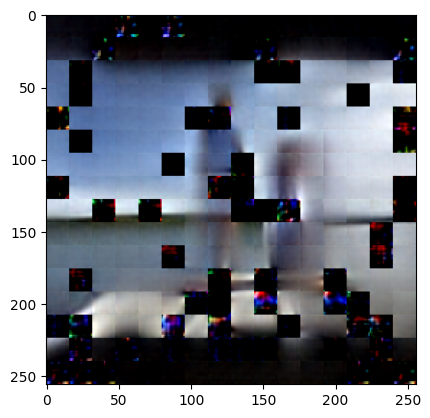

In [24]:
import matplotlib.pyplot as plt
plt.imshow(rect_image_output)
plt.show()

In [30]:
text_output = text_output[1,...]


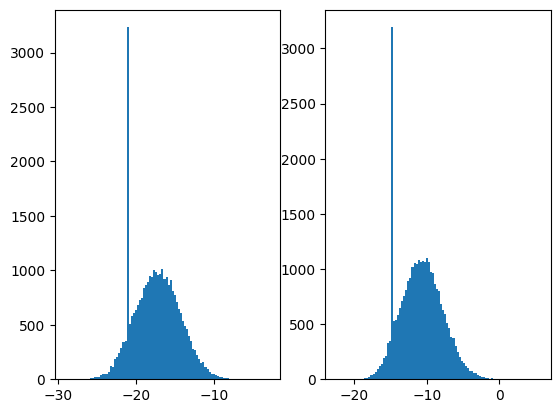

In [36]:
import matplotlib.pyplot as plt
plt.subplot(121)
plt.hist(text_output[1, :], bins=100)
plt.subplot(122)
plt.hist(text_output[4, :], bins=100)
plt.show()


In [47]:
text_output_ids = np.expand_dims(np.argmax(text_output, axis=1), axis=1)
text_output_vals = np.take_along_axis(text_output, text_output_ids, axis=1)
text_output_ids = text_output_ids.squeeze(axis=1)


In [48]:
tokenizer = transformers.BertTokenizer.from_pretrained("bert-base-uncased")
text_final = tokenizer.decode(text_output_ids)


In [51]:
print(text_final)

the boat boat boat boat boat a


In [ ]:
text_output_ids = np.random.choice(np.histogram(text_output[1,:], bins=100))